# Clustering Jerárquico

## Importación de librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from IPython.display import Image
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

## Cargar el conjunto de datos

In [2]:
datos = pd.read_csv('Mall_Customers.csv')
datos.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X = datos.filter(["Annual Income (k$)", "Spending Score (1-100)"])

In [4]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## Uso de un dendrograma parar encontrar el número óptimo de clusters

NOTA:  El método Ward que se usa, es uno de los más comunes para obtener la Varianza Mínima

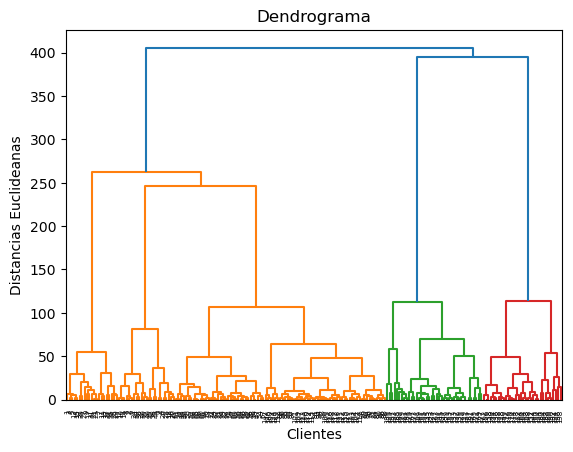

In [5]:
dendrograma = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancias Euclideanas')
plt.show()

## Entrenar el modelo de clustering jerárquico con el conjunto de datos

In [11]:
num_clusters = 3
clust_jerarq = AgglomerativeClustering(n_clusters = num_clusters, metric = 'euclidean', linkage = 'ward')
clusters = clust_jerarq.fit_predict(X)

In [12]:
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [13]:
X_con_clusters = X.copy()
X_con_clusters["Cluster"] = clusters
X_con_clusters["Cluster"] = X_con_clusters["Cluster"].astype("category")

In [14]:
X_con_clusters.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,0
1,15,81,0
2,16,6,0
3,16,77,0
4,17,40,0


## Visualización de los clusters

Plotly maneja diferentes paletas de colores para datos discretos y datos contínuos.  En este ejemplo, los datos son discretos, por lo que se puede usar el parámetro "color_discrete_sequence":

color_discrete_sequence = px.colors.qualitative.**nombre_paleta**

Los colores disponibles son:

![Paletas de Colores](Plotly_qualitative_colors.png)






/Users/Grandpa/anaconda3/envs/ML/lib/python3.11/site-packages/plotly/express/_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



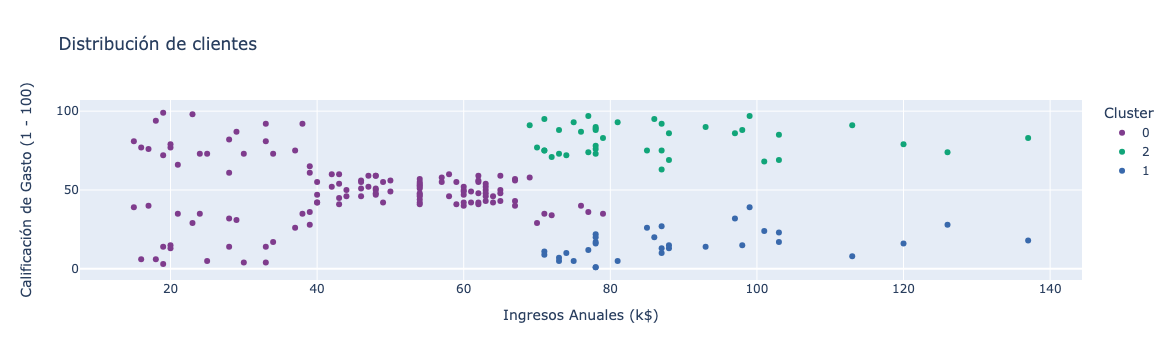

In [15]:
px.scatter(data_frame = X_con_clusters
           ,x = 'Annual Income (k$)'
           ,y = 'Spending Score (1-100)'
           ,color = 'Cluster'
           ,color_discrete_sequence = px.colors.qualitative.Bold
           ,title = "Distribución de clientes"
           ,labels = {'Annual Income (k$)': 'Ingresos Anuales (k$)'
                      ,'Spending Score (1-100)': 'Calificación de Gasto (1 - 100)'
                     }
           )

Con nuestro método de determinar el número óptimo de clusters, hubo duda...por lo cercano de los valores...sobre si el valor es 3 o 5.  Podemos probar con 3 y ver qué resultados da.